<a href="https://colab.research.google.com/github/mtofighi/ChilwaBasin/blob/main/ChilwaBasin_DataAnalysis_032024/ChilwaBasin_Regression_PyCaret_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last updated: 25 Mar 2024
# >> Temperature

# 👋 PyCaret Regression Tutorial


In [4]:
!pip install pycaret -q #[full] -q

In [5]:
!pip install pycaret[analysis] -q
!pip install pycaret[models] -q
!pip install pycaret[tuner] -q
!pip install pycaret[mlops] -q
!pip install pycaret[parallel] -q
!pip install pycaret[test] -q

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
# check installed version (must be >3.0)
import pycaret
pycaret.__version__

'3.3.0'

# 🚀 Quick start

PyCaret's Regression Module is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).

The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.

PyCaret's regression module has many preprocessing capabilities and it coems with over 25 ready-to-use algorithms and several plots to analyze the performance of trained models.

A typical workflow in PyCaret Regression module consist of the following 5 steps in this order:

### **Setup** ➡️ **Compare Models** ➡️ **Analyze Model** ➡️ **Prediction** ➡️ **Save Model**
<br/>

In [10]:
### load sample dataset from pycaret dataset module
# from pycaret.datasets import get_data
# data = get_data('insurance')

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/mtofighi/ChilwaBasin/blob/main/ChilwaBasin_DataAnalysis_032024/Dataset/ChilwaBasin_Dataset_03012024.xlsx?raw=true'

dataAll = pd.read_excel(url)

# Convert the index to datetime format (assuming the index is in a date format)
dataAll.index = pd.to_datetime(dataAll.iloc[:, 0])

# Extract year and month from the index
dataAll['Year'] = dataAll.index.year
dataAll['Month'] = dataAll.index.month

# Set the columns 'Year' and 'Month' as the index
dataAll.set_index(['Year', 'Month'], inplace=True)

# # Check the type of dataset
# print("Data types:", data.dtypes)

# # Check the shape of the data
# print("Data shape:", data.shape)

# Convert the column names to an array
# headers = dataAll.columns.to_numpy()

# Print the headers array
# print("Headers:", headers)

## Setup
The `setup` function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [156]:
# Temperature

# import pycaret regression and init setup
from pycaret.regression import *
##---------------------------------------------
# The dataset is called 'dataAll'

# All column Heasers
column_names = ['Date', 'SatelliteAverageMinTemperature',
    'SatelliteAverageMinTemperatureStandardizedAnomaly',
    'SatelliteAverageMaxTemperature', 'AverageMeanTemperature',
    'AverageMeanTemperatureAnomaly',
    'AverageMeanTemperatureStandardizedAnomaly', 'ChancoMeanTemperature',
    'ChingaleMeanTemperature', 'MakokaMeanTemperature',
    'NaminjiwaMeanTemperature' ,'NtajaMeanTemperature',
    'ZombaRTCMeanTemperature', 'AverageMinTemperature',
    'AverageMinTemperatureAnomaly', 'AverageMinTemperatureStandardizedAnomaly',
    'ChancoMinTemperature', 'ChingaleMinTemperature', 'MakokaMinTemperature',
    'NaminjiwaMinTemperature' ,'NtajaMinTemperature', 'ZombaRTCMinTemperature',
    'AverageMaxTemperature' ,'AverageMaxTemperatureAnomaly',
    'AverageMaxTemperatureStandardizedAnomaly' ,'ChancoMaxTemperature',
    'ChingaleMaxTemperature', 'MakokaMaxTemperature', 'NaminjiwaMaxTemperature',
    'NtajaMaxTemperature' ,'ZombaRTCMaxTemperature', 'SatelliteAverageRainfall',
    'SatelliteAverageRainfallStandardizedAnomaly' ,'AverageRainfall',
    'RainfallAnomaly', 'StandardizedRainfallAnomaly' ,'ChancoRainfall',
    'ChingaleRainfall' ,'MakokaRainfall', 'NaminjiwaRainfall', 'NtajaRainfall',
    'ZombaRTCRainfall' ,'ChancellorCollegeRainfall', 'ChimpeniRainfall',
    'ReturnPeriod', 'ActualEvapotransp', 'ReferenceEvapoTransp', 'SoilMoisture',
    'SPI1' ,'SPI3' ,'SPI6' ,'SPI12' ,'SPI24','SPI36', 'SPI48', 'SPI60', 'SPI72',
    'PalmerDroughtSeverityIndex', 'Waterloggingkm2', 'LakeSurfaceAreakm2',
    'LakeDepthm' ,'NDVIAreakm2', 'CholeraCasesD1', 'CholeraCasesD2',
    'CholeraCasesD3', 'CholeraCasesD4', 'CholeraCasesTotal',
    'SchistosomiasisCasesD1', 'SchistosomiasisCasesD2',
    'SchistosomiasisCasesD3', 'SchistosomiasisCasesD4',
    'SchistosomiasisCasesTotal', 'MalariaCasesD1', 'MalariaCasesD2',
    'MalariaCasesD3', 'MalariaCasesD4', 'MalariaCasesTotal', 'MosquitoNetsD1',
    'MosquitoNetsD2', 'MosquitoNetsD3' ,'MosquitoNetsD4', 'MosquitoNetsTotal',
    'CholeraCases_AllDistricts', 'CholeraDeaths_AllDistricts',
    'Malnutrition_LT5_NewCases_AllDistricts',
    'Malnutrition_LT5_InpatientDeaths_AllDistricts', 'DiarrhoeaCases_Machinga',
    'DiarrhoeaCases_Zomba' ,'DiarrhoeaCases_Phalombe',
    'DiarrhoeaCases_AllDistricts', 'SchistosomiasisCases_Machinga',
    'SchistosomiasisCases_Zomba', 'SchistosomiasisCases_Phalombe',
    'SchistosomiasisCases_AllDistricts', 'CholeraCasesDOH_Zomba',
    'MalariaCasesDOH_Zomba', 'DiarrheaCasesDOH_Zomba',
    'PopulationChilwaBasinMalawi', 'PopulationZomba',
    'CerealProductionChilwaBasinMalawi' ,'CerealProductionPerCapitaKgPerDay',
    'TotalFishCatch' ,'MaizeArea_HA_D1', 'MaizeProduction_MT_D1',
    'RiceArea_HA_D1', 'RiceProduction_MT_D1', 'TobaccoArea_HA_D1',
    'TobaccoProduction_MT_D1', 'UREA_T_D1', 'MaizeArea_HA_D2',
    'MaizeProduction_MT_D2', 'RiceArea_HA_D2', 'RiceProduction_MT_D2',
    'TobaccoArea_HA_D2' ,'TobaccoProduction_MT_D2', 'UREA_T_D2',
    'MaizeArea_HA_D4', 'MaizeProduction_MT_D4', 'RiceArea_HA_D4',
    'RiceProduction_MT_D4' ,'TobaccoArea_HA_D4', 'TobaccoProduction_MT_D4',
    'UREA_T_D4' ,'MaizeAreaTotal_HA', 'MaizeProductionTotal_MT',
    'RiceAreaTotal_HA' ,'RiceProductionTotal_MT' ,'TobaccoAreaTotal_HA',
    'TobaccoProductionTotal_MT', 'UREATotal_T'
]  # Specify the desired column names

# column_names = [
#     'Date', 'SatelliteAverageMinTemperature',
#     'SatelliteAverageRainfall',
#     'AverageMeanTemperature'
# ]  # Specify the desired column names

# column_names = [
#     'Date', 'SatelliteAverageMinTemperature', 'SatelliteAverageMinTemperatureStandardizedAnomaly', 'ActualEvapotransp',
#     'SoilMoisture', 'SPI1','SPI3' ,'SPI6', 'SPI12',
#     'SPI24', 'SPI36', 'SPI48', 'SPI60' ,'SPI72', 'Waterloggingkm2',
#     'SatelliteAverageRainfall','SatelliteAverageRainfallStandardizedAnomaly',
#     'AverageMinTemperature','AverageMinTemperatureStandardizedAnomaly',
#     'AverageRainfall','StandardizedRainfallAnomaly',
#     'PalmerDroughtSeverityIndex',
#     'CholeraCasesD1' ,'CholeraCasesD2' ,'CholeraCasesD3', 'CholeraCasesD4',
#     'CholeraCasesTotal',
#     'SchistosomiasisCasesD1', 'SchistosomiasisCasesD2', 'SchistosomiasisCasesD3', 'SchistosomiasisCasesD4',
#     'SchistosomiasisCasesTotal',
#     'MalariaCasesD1', 'MalariaCasesD2', 'MalariaCasesD3', 'MalariaCasesD4',
#     'MalariaCasesTotal',
#     'MosquitoNetsD1' ,'MosquitoNetsD2','MosquitoNetsD3','MosquitoNetsD4',
#     'MosquitoNetsTotal',
#     'Malnutrition_LT5_NewCases_AllDistricts'
# ]  # Specify the desired column names

start_date = '1981-01-01'  # Specify the start date
end_date = '2018-12-01'  # Specify the end date
# start_date = '1946-01-01'  # Specify the start date
# end_date = '2021-12-01'  # Specify the end date
# Filter the data based on the column names and date range
sub_dataset = dataAll.loc[
    (dataAll['Date'] >= start_date) & (dataAll['Date'] <= end_date), column_names
]

# # Drop rows with missing values
# sub_dataset.dropna(inplace=True)

# Extract the features      'SatelliteAverageRainfall',
data = sub_dataset[
    [
     'SatelliteAverageMinTemperature',
     'SatelliteAverageMinTemperatureStandardizedAnomaly'
    ]
]

s = setup(data, target= 'SatelliteAverageMinTemperatureStandardizedAnomaly', session_id = 123)

,Description,Value
0,Session id,123
1,Target,SatelliteAverageMinTemperatureStandardizedAnomaly
2,Target type,Regression
3,Original data shape,"(912, 2)"
4,Transformed data shape,"(912, 2)"
5,Transformed train set shape,"(638, 2)"
6,Transformed test set shape,"(274, 2)"
7,Numeric features,1
8,Preprocess,True
9,Imputation type,simple


## Compare Models

The `compare_models` function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [157]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0260
huber,Huber Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0800
ridge,Ridge Regression,0.0006,0.0000,0.0007,1.0000,0.0002,0.0002,0.0260
lar,Least Angle Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0270
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0250
br,Bayesian Ridge,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0290
xgboost,Extreme Gradient Boosting,0.0061,0.0047,0.0375,0.9994,0.0079,0.0029,0.0500
dt,Decision Tree Regressor,0.0049,0.0046,0.0353,0.9994,0.0072,0.0021,0.0260
catboost,CatBoost Regressor,0.0116,0.0047,0.0393,0.9994,0.0097,0.0100,0.4280
et,Extra Trees Regressor,0.0029,0.0041,0.0233,0.9994,0.0038,0.0006,0.1330


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

## Analyze Model

The `plot_model` function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.

In [92]:
# # plot residuals
# plot_model(best, plot = 'residuals')

In [74]:
# # plot error
# plot_model(best, plot = 'error')

In [75]:
# # plot feature importance
# # plot_model(best, plot = 'feature')
# #-------------------------------
# import matplotlib.pyplot as plt
# # Plot and retrieve feature importance
# plot_model(best, plot='feature')
# plt.savefig('Temp_feature_importance_plot.jpg', dpi=300, bbox_inches='tight')

# # Retrieve the configuration
# config = get_config('X_train')

# # Access feature values
# feature_values = config.columns

# # Retrieve feature importance values
# feature_importance_values = best.get_feature_importance()

# # Create a DataFrame to store feature names, values, and importance
# feature_df = pd.DataFrame({'Feature': feature_values, 'Importance': feature_importance_values})

# # Print the merged DataFrame
# print(feature_df)

# # Save to an Excel file
# feature_df.to_excel('Temp_feature_values_importance.xlsx', index=False)

In [ ]:
# # check docstring to see available plots
# help(plot_model)

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses `ipywidget`.

In [100]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

___

## Prediction
The `predict_model` function returns `prediction_label` as new column to the input dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [60]:
# # predict on test set
# holdout_pred = predict_model(best)

In [59]:
# # show predictions df
# holdout_pred.head()

___

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [58]:
# # save pipeline
# save_model(best, 'my_first_pipeline')

In [57]:
# # load pipeline
# loaded_best_pipeline = load_model('my_first_pipeline')
# loaded_best_pipeline

# 👇 Create Reqired Tree Function



## ✅ Finalize Model
This function trains a given model on the entire dataset including the hold-out set.

In [55]:
# final_best = finalize_model(best)

In [56]:
# final_best

## ✅ Compare Models
The `compare_models` function trains and evaluates the performance of all estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [66]:
# best = compare_models()

`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


You can use the `include` and `exclude` parameter in the `compare_models` to train only select model or exclude specific models from training by passing the model id's in `exclude` parameter.

In [103]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])#, 'catboost'

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1.1498,2.0547,1.4301,0.6541,0.0480,0.0405,0.0870
catboost,CatBoost Regressor,1.1568,2.0959,1.4444,0.6475,0.0485,0.0408,0.4020
lightgbm,Light Gradient Boosting Machine,1.1742,2.1119,1.4507,0.6450,0.0488,0.0414,0.5660
rf,Random Forest Regressor,1.1805,2.2029,1.4805,0.6300,0.0498,0.0416,0.1730
et,Extra Trees Regressor,1.1853,2.2251,1.4885,0.6260,0.0501,0.0418,0.1370
dt,Decision Tree Regressor,1.1852,2.2257,1.4887,0.6259,0.0501,0.0418,0.0260
xgboost,Extreme Gradient Boosting,1.1876,2.2307,1.4902,0.6252,0.0501,0.0419,0.0510


Processing:   0%|          | 0/33 [00:00<?, ?it/s]

In [78]:
# compare_tree_models

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [77]:
# compare_tree_models_results = pull()
# compare_tree_models_results

By default `compare_models` return the single best performing model based on the metric defined in the `sort` parameter. Let's change our code to return 3 top models based on `MAE`.

In [53]:
# best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

Some other parameters that you might find very useful in `compare_models` are:

- fold
- cross_validation
- budget_time
- errors
- probability_threshold
- parallel

You can check the docstring of the function for more info.

In [ ]:
# help(compare_models)

## ✅ Plot Model

The `plot_model` function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.

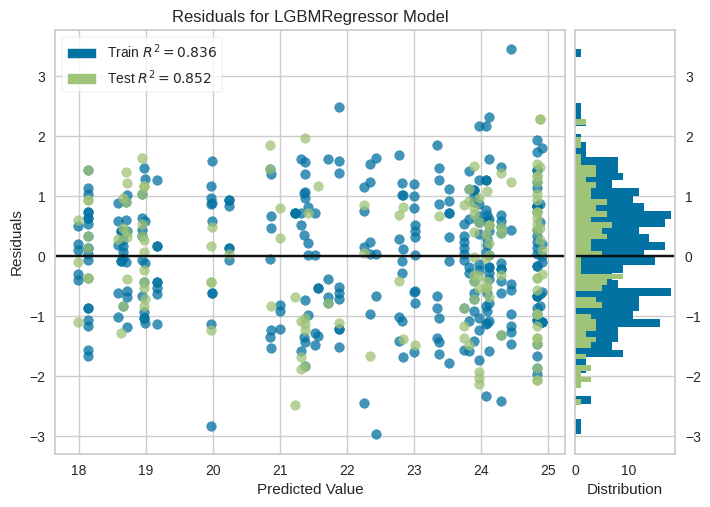

In [38]:
# plot residuals
# plot_model(best, plot = 'residuals') #---------------------
plot_model(compare_tree_models, plot = 'residuals', scale =1.0) #---------------------

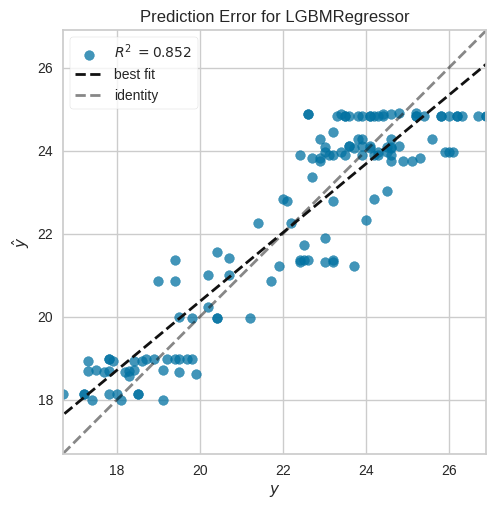

In [39]:
# to control the scale of plot
plot_model(compare_tree_models, plot = 'error', scale = 1) #--------------------------

In [40]:
# to save the plot
plot_model(compare_tree_models, plot = 'error', save=True) #--------------------------
plot_model(compare_tree_models, plot = 'residuals', save=True) #--------------------------

'Residuals.png'

Some other parameters that you might find very useful in `plot_model` are:

- fit_kwargs
- plot_kwargs
- groups
- display_format

You can check the docstring of the function for more info.

In [ ]:
# help(plot_model) #--------------------------

## ✅ Create Model
The `create_model` function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function. All the available models can be accessed using the `models` function.

In [68]:
# # check all the available models
# models()

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [154]:
# train model with default fold=10
# dt = create_model('dt')
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.2118,2.0979,1.4484,0.6031,0.0653,0.0586
1,1.3302,2.6237,1.6198,0.7363,0.0759,0.0659
2,1.1359,1.8334,1.3540,0.7508,0.0617,0.0529
3,1.2900,2.3276,1.5257,0.7215,0.0691,0.0618
4,1.4330,2.6380,1.6242,0.6149,0.0714,0.0668
5,1.4269,2.4724,1.5724,0.7414,0.0745,0.0708
6,1.1000,1.6048,1.2668,0.7150,0.0592,0.0542
7,1.1664,1.8285,1.3522,0.7923,0.0659,0.0602
8,1.3990,2.9485,1.7171,0.4591,0.0777,0.0653


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [43]:
# dt_results = pull()
# print(type(dt_results))
# dt_results

In [52]:
# # train linear regression with fold=3
# lr = create_model('lr', fold=3)

In [45]:
# # train lr and return train score as well alongwith CV
# create_model('dt', return_train_score=True)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Convert Model
This function transpiles the trained machine learning model's decision function in different programming languages such as Python, C, Java, Go, C#, etc. It is very useful if you want to deploy models into environments where you can't install your normal Python stack to support model inference.

In [128]:
# print(compare_tree_models.feature_names_in_)
# print(dt.feature_names_in_)
print(lr.feature_names_in_)

['SatelliteAverageMinTemperature']


In [129]:
feature_names_in_ = ['SatelliteAverageMinTemperature']

# Add "v_" to the feature names
feature_names_v_ = [f'v_{name}' for name in feature_names_in_]

# Create an array of input variables using list comprehension
input_variables = [f'input[{i}] = {feature_names_v_[i]}' for i in range(len(feature_names_v_))]

# Print the array of input variables
for input_var in input_variables:
    print(input_var)

input[0] = v_SatelliteAverageMinTemperature


In [155]:
# transpiles learned function to java
# print(convert_model(dt, language = 'java'))
print(convert_model(lr, language = 'java'))

public class Model {
    public static double score(double[] input) {
        return 5.573662757873535 + input[0] * 0.912589967250824;
    }
}



## ✅ AnyLogic Code


        return 7.252778053283691 + v_SatelliteAverageMinTemperature * 0.8848339915275574; // R2 = 0.7866, v_AverageMeanTemperature

        return -14.853479385375977 + v_SatelliteAverageMinTemperature * 0.882835328578949; // R2 = 0.7866, AverageMeanTemperatureAnomaly


v_SatelliteAverageMinTemperatureStandardizedAnomaly

In [49]:
# # Visualize the decision tree using plot_tree
# plt.figure(figsize=(12, 6))
# plot_model(dt, 'tree')
# plt.savefig('decision_tree_Cholera_high_res.jpg', dpi=300, bbox_inches='tight')
# plt.show()

In [50]:
# import graphviz
# from sklearn.tree import export_graphviz

# feature_names = dt.feature_names_in_

# # Export the decision tree to DOT format
# dot_data = export_graphviz(dt, out_file=None, feature_names=feature_names, filled=True, rounded=True, special_characters=True)

# # Visualize the decision tree
# graph = graphviz.Source(dot_data)
# graph.view()  # This line will display the decision tree graph
# graph.render("decision_tree_Cholera", format="png", cleanup=True)

___